
Introduction

   * **Natural Language Processing (NLP)**: The discipline of computer science, artificial intelligence and linguistics that is concerned with the creation of computational models that process and understand natural language. These include: making the computer understand the semantic grouping of words (e.g. cat and dog are semantically more similar than cat and spoon), text to speech, language translation and many more

   * **Sentiment Analysis**: It is the interpretation and classification of emotions (positive, negative and neutral) within text data using text analysis techniques. Sentiment analysis allows organizations to identify public sentiment towards certain words or topics.

In this notebook, we'll develop a **Sentiment Analysis** model to categorize a tweet as **Positive or Negative**.

### Table of Contents:

    1.     Importing dependencies
    2.     Importing dataset
    3.     Preprocessing Text
    4.     Analysing data
    5.     Splitting data
    6.     TF-IDF Vectoriser
    7.     Transforming Dataset
    8.     Creating and Evaluating Models
    9.         * BernoulliNB Model
    10.        * LinearSVC Model
    11.        * Logistic Regression Model
    12.     Saving the Models
    13.     Using the Model
 



### 1. Importing dependencies

In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns
import string
%matplotlib inline 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


### 2.     Importing dataset

In [38]:
dataset = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding ="ISO-8859-1" ,
                 names=["target", "ids", "date", "flag", "user", "text"])

In [39]:
dataset.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [41]:
dataset.describe(include = 'O')

,date,flag,user,text
count,1600000,1600000,1600000,1600000
unique,774363,1,659775,1581466
top,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,20,1600000,549,210


In [42]:
# Printing the length of the dataset
print("Dataset length : {}".format(len(dataset)))

Dataset length : 1600000


In [43]:
print("Dataset shape : {}".format(dataset.shape))

Dataset shape : (1600000, 6)


In [44]:
#Checking for null values
dataset.isnull().any()

target    False
ids       False
date      False
flag      False
user      False
text      False
dtype: bool

In [45]:
dataset.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [46]:
# Checking the target values
dataset.target.value_counts()

4    800000
0    800000
Name: target, dtype: int64

### The tweets have been annotated **(0 = Negative, 4 = Positive)** and they can be used to detect sentiment.

* Plotting the distribution for the dataset

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

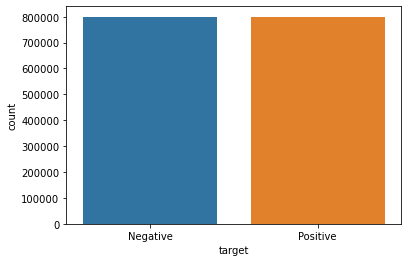

In [47]:
g = sns.countplot(dataset['target'], data=dataset)
g.set_xticklabels(["Negative", "Positive"], rotation=0)

In [48]:
dataset.user.value_counts()

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
jbesteleydes         1
ctmayer              1
siobhan715           1
wadael               1
ValerieeG            1
Name: user, Length: 659775, dtype: int64

##     3.     Preprocessing Text
 

* Removing punctuations from the dataset
* Replacing punctuation with blank spaces
* Removing html tags
* Removing symbols
* Removing numbers, etc.

In [49]:
import re

In [50]:
def remove_noise(text):
    # Dealing with Punctuation
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [51]:
# Applying the remove_noise function on the dataset

dataset['text'] = dataset['text'].apply(lambda x : remove_noise(x))

In [52]:
dataset.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot Awww thats a bummer You shoulda ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his Facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,Kenichan I dived many times for the ball Manag...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im ...


* Converting the uppercase letters to lower case

In [53]:
dataset['text'] = dataset['text'].apply(lambda x : x.lower())

In [54]:
dataset.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww thats a bummer you shoulda ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball manag...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im ...


In [55]:
dataset['text'][12314]

'twotonedc the estate  whats that really dont go out on the wknds cause i work '

## Removing the stopwords from the dataset

In [56]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')

In [57]:
# Removing stopwords

def remove_stopwords(text):
    text = [item for item in text.split() if item not in stop]
    return ' '.join(text)

dataset['cleaned_data'] = dataset['text'].apply(remove_stopwords)

###     4.     Analysing data


In [58]:
dataset.head()

,target,ids,date,flag,user,text,cleaned_data
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww thats a bummer you shoulda ...,switchfoot awww thats bummer shoulda got david...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball manag...,kenichan dived many times ball managed save re...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im ...,nationwideclass behaving im mad cant see


###    5.     Splitting data

* Stemming the data

In [59]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return ' '.join(text)

dataset['stemed_text'] = dataset['cleaned_data'].apply(stemming)

dataset.head()

,target,ids,date,flag,user,text,cleaned_data,stemed_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww thats a bummer you shoulda ...,switchfoot awww thats bummer shoulda got david...,switchfoot awww that bummer shoulda got david ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...,upset cant update facebook texting might cry r...,upset cant updat facebook text might cri resul...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball manag...,kenichan dived many times ball managed save re...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im ...,nationwideclass behaving im mad cant see,nationwideclass behav im mad cant see


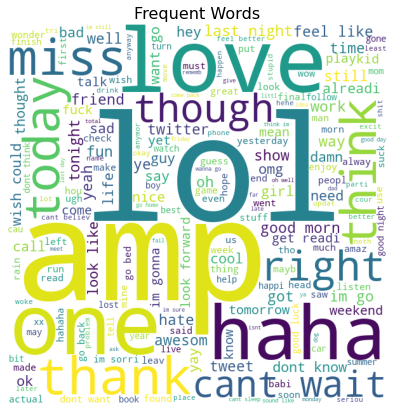

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1, figsize=[7, 7])
wordcloud = WordCloud( background_color='white', width=600, height=600).generate(" ".join(dataset['stemed_text']))

ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('Frequent Words',fontsize=16);

###    5.     TF-IDF Vectorizer


### Using TF-IDF Vectorizer to convert tweets into vectors

TF-IDF indicates what the importance of the word is in order to understand the document or dataset. Let us understand with an example. Suppose you have a dataset where students write an essay on the topic, My House. In this dataset, the word a appears many times; it’s a high frequency word compared to other words in the dataset. The dataset contains other words like home, house, rooms and so on that appear less often, so their frequency are lower and they carry more information compared to the word. This is the intuition behind TF-IDF.

TF-IDF Vectoriser converts a collection of raw documents to a matrix of TF-IDF features. The Vectoriser is usually trained on only the X_train dataset.

ngram_range is the range of number of words in a sequence. [e.g "very expensive" is a 2-gram that is considered as an extra feature separately from "very" and "expensive" when you have a n-gram range of (1,2)]

max_features specifies the number of features to consider. [Ordered by feature frequency across the corpus].

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=500000)

x = tfidf.fit_transform(dataset['stemed_text'])

In [62]:
tfidf.get_feature_names()[:20]

['aa',
 'aa batteri',
 'aa get',
 'aa good',
 'aa love',
 'aa man',
 'aa meet',
 'aa show',
 'aaa',
 'aaa batteri',
 'aaa cant',
 'aaa love',
 'aaa rescu',
 'aaaa',
 'aaaa im',
 'aaaa miss',
 'aaaaa',
 'aaaaaa',
 'aaaaaaa',
 'aaaaaaaa']

In [63]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 500000,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [64]:
print(x[0].todense())

[[0. 0. 0. ... 0. 0. 0.]]


In [65]:
y = dataset['target']

In [66]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [67]:
from sklearn.model_selection import train_test_split
import itertools
import numpy as np
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

### 6. Creating the models

## Applying MultinomialNB

* Naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models

The Accuracy score for MultinomialNB is : 0.7841958333333333
Confusion matrix, without normalization


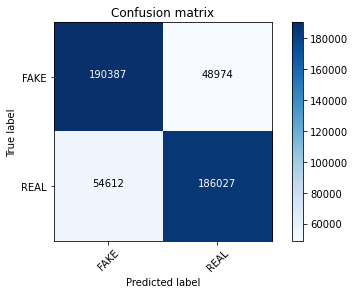

In [68]:
from sklearn.naive_bayes import MultinomialNB

multinb = MultinomialNB(alpha=1.9)
multinb.fit(x_train, y_train)

multi_predict = multinb.predict(x_test)
multinb_accuracy_score = accuracy_score(y_test, multi_predict)
print("The Accuracy score for MultinomialNB is : {}".format(multinb_accuracy_score))

multinb_conf_mat = confusion_matrix(y_test, multi_predict)
plot_confusion_matrix(multinb_conf_mat, classes = ['FAKE', 'REAL'])

## Hyperparameter tuning for MultinomialNB

In [69]:
%%time

multinb_classifier = MultinomialNB(alpha=0.1)

previous_score = 0

# We are taking values from 0 to 1 with an increament of 0.1 

for alpha in np.arange(0,2,0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train, y_train)
    y_pred = sub_classifier.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    
    if score> previous_score:
        classifier = sub_classifier
        print("Alpha is : {} & Accuracy is : {}".format(alpha, score))

/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha is : 0.0 & Accuracy is : 0.747325
Alpha is : 0.1 & Accuracy is : 0.7696041666666666
Alpha is : 0.2 & Accuracy is : 0.77416875
Alpha is : 0.30000000000000004 & Accuracy is : 0.7766708333333333
Alpha is : 0.4 & Accuracy is : 0.7782416666666667
Alpha is : 0.5 & Accuracy is : 0.77936875
Alpha is : 0.6000000000000001 & Accuracy is : 0.78053125
Alpha is : 0.7000000000000001 & Accuracy is : 0.78133125
Alpha is : 0.8 & Accuracy is : 0.7819104166666667
Alpha is : 0.9 & Accuracy is : 0.7823666666666667
Alpha is : 1.0 & Accuracy is : 0.7827375
Alpha is : 1.1 & Accuracy is : 0.7830395833333333
Alpha is : 1.2000000000000002 & Accuracy is : 0.7833458333333333
Alpha is : 1.3 & Accuracy is : 0.7835354166666667
Alpha is : 1.4000000000000001 & Accuracy is : 0.78370625
Alpha is : 1.5 & Accuracy is : 0.783775
Alpha is : 1.6 & Accuracy is : 0.7838833333333334
Alpha is : 1.7000000000000002 & Accuracy is : 0.7839791666666667
Alpha is : 1.8 & Accuracy is : 0.7840729166666667
Alpha is : 1.900000000000000

### Applying BernoulliNB

The Accuracy score for BernoulliNB is 0.7840895833333333 : 
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.80      0.76      0.78    239361
           4       0.77      0.81      0.79    240639

    accuracy                           0.78    480000
   macro avg       0.78      0.78      0.78    480000
weighted avg       0.78      0.78      0.78    480000



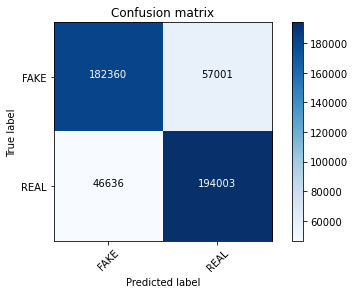

In [70]:
from sklearn.naive_bayes import BernoulliNB

bernoullinb = BernoulliNB(alpha=2)
bernoullinb.fit(x_train, y_train)

bernoulli_pred = bernoullinb.predict(x_test)

bernoulli_acc_score = accuracy_score(y_test, bernoulli_pred)
print("The Accuracy score for BernoulliNB is {} : ".format(bernoulli_acc_score))

print("=======================================================================================")

bernoullinb_conf_mat = confusion_matrix(y_test, bernoulli_pred)
plot_confusion_matrix(bernoullinb_conf_mat, classes = ['FAKE', 'REAL'])


bernoullinb_class_report = classification_report(y_test, bernoulli_pred)
print(bernoullinb_class_report)

### Applying Logistic Regression

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.81      0.77      0.79    239361
           4       0.78      0.82      0.80    240639

    accuracy                           0.80    480000
   macro avg       0.80      0.80      0.80    480000
weighted avg       0.80      0.80      0.80    480000



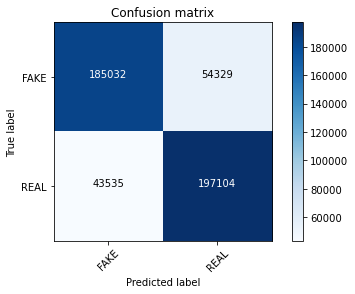

In [71]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_pred = log_reg.predict(x_test)

log_reg_conf_mat = confusion_matrix(y_test, log_pred)
plot_confusion_matrix(log_reg_conf_mat, classes = ['FAKE', 'REAL'])


log_reg_class_report = classification_report(y_test, log_pred)
print(log_reg_class_report)

* We can clearly see that the Logistic Regression Model performs the best out of all the different models that we tried. It achieves nearly 80% accuracy while classifying the sentiment of a tweet.

* Although it should also be noted that the BernoulliNB Model is the fastest to train and predict on. It also achieves 78% accuracy while calssifying.


## Saving the models

In [73]:
import pickle

file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(tfidf, file)
file.close()

file = open('Sentiment-LR.pickle','wb')
pickle.dump(log_reg, file)
file.close()

file = open('Sentiment-BNB.pickle','wb')
pickle.dump(bernoullinb, file)
file.close()